In [268]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-prdiction/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [269]:
import os
print(os.listdir("/kaggle/input"))


['customer-churn-prdiction']


In [270]:
print(os.listdir("/kaggle/input/customer-churn-prdiction"))


['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [271]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/customer-churn-prdiction/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Quick checks
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check for missing values

In [272]:
# Check missing values
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In this dataset, the customerID column is just an identifier → not useful for prediction.

In [273]:
df = df.drop(columns=["customerID"])


Handle TotalCharges column

In [274]:
# Convert TotalCharges to numeric (force errors to NaN)
# Convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill NaN with median (safe way)
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [275]:
print(df["TotalCharges"].isnull().sum())


0


Churn Distribution

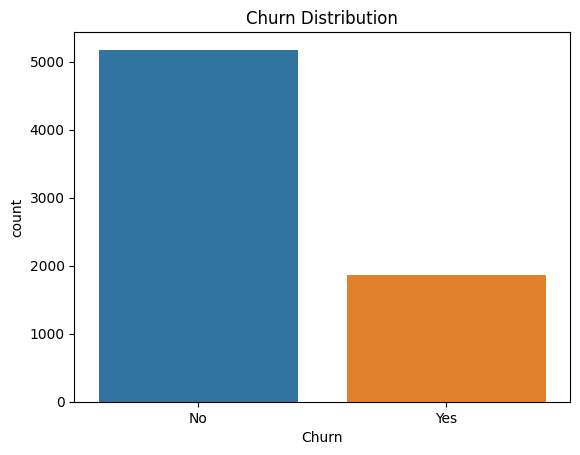

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of churned vs not churned customers
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


Churn by Contract Type

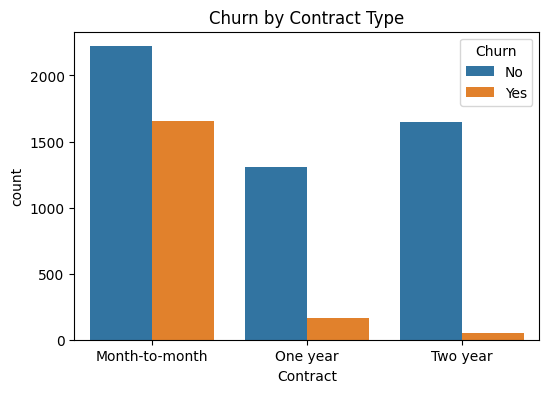

In [277]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


Churn vs Tenure

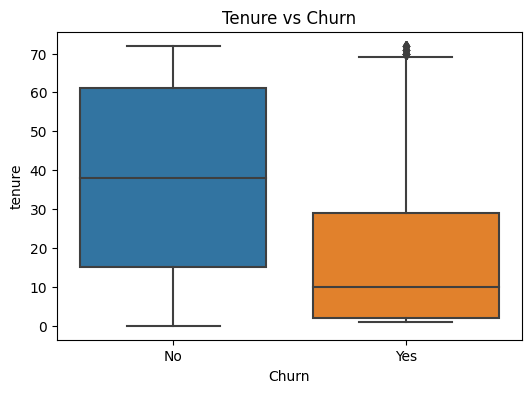

In [278]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


Churn by Internet Service

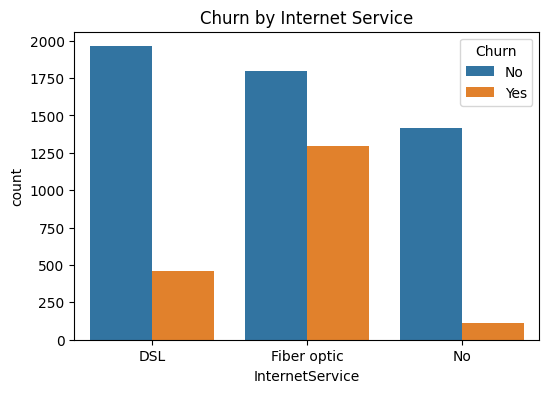

In [279]:
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service")
plt.show()


Encode categorical data & prepare X/y

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target variable
df["Churn_Flag"] = df["Churn"].map({"Yes":1, "No":0})

# Features (X) and Target (y)
X = df.drop(columns=["Churn","Churn_Flag"])
y = df["Churn_Flag"]

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)


In [281]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Encoded features:", X.columns[:10].tolist())


X shape: (7043, 30)
y shape: (7043,)
Encoded features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes']


Train-test split

In [282]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Train logistic regression model

Train logistic regression model and Evaluate model

Accuracy : 0.741
Precision: 0.5078
Recall   : 0.7834
F1       : 0.6162
ROC-AUC  : 0.8427

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



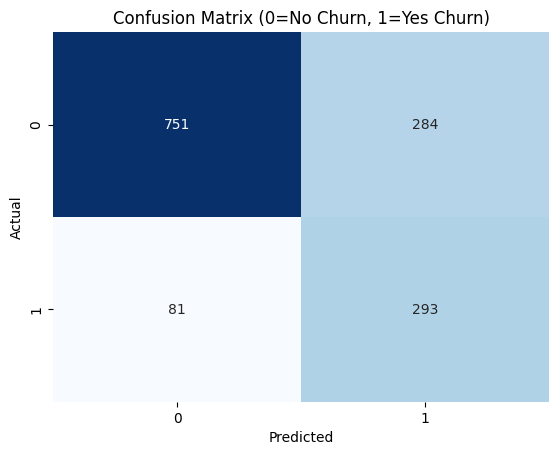

In [283]:
# --- Step 4C + 4D: Train & Evaluate Logistic Regression ---

# Train model
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=-1)
log_reg.fit(X_train, y_train)

# Predictions
y_pred  = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

# Metrics
print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall   :", round(recall_score(y_test, y_pred), 4))
print("F1       :", round(f1_score(y_test, y_pred), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba), 4))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (0=No Churn, 1=Yes Churn)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Feature Importance (Top Drivers of Churn)


Top 15 features by |coefficient|:



Contract_Two year                -1.206390
Contract_One year                -0.646304
OnlineSecurity_Yes               -0.531291
MultipleLines_No phone service    0.526594
TechSupport_Yes                  -0.487379
InternetService_Fiber optic       0.464668
PhoneService_Yes                 -0.413586
PaymentMethod_Electronic check    0.402007
PaperlessBilling_Yes              0.292566
Dependents_Yes                   -0.254386
OnlineBackup_Yes                 -0.253573
MultipleLines_Yes                 0.182786
DeviceProtection_Yes             -0.163781
SeniorCitizen                     0.147527
PaymentMethod_Mailed check        0.092689
dtype: float64

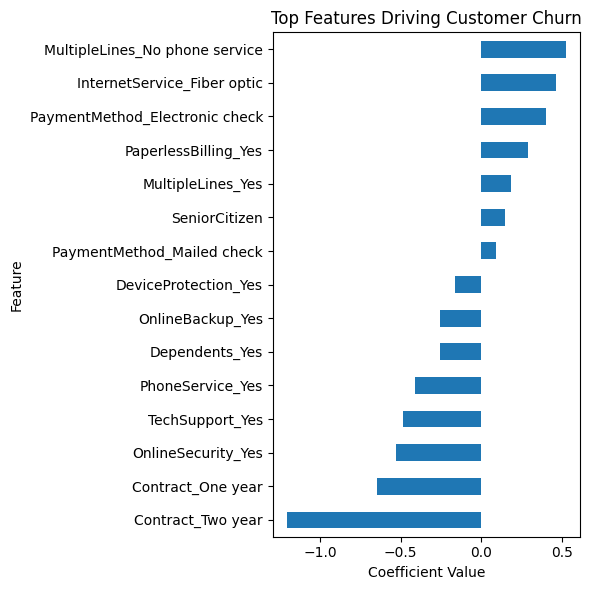

In [284]:
import numpy as np
import pandas as pd

# Get coefficients from Logistic Regression
coef = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(key=np.abs, ascending=False)

# Top 15 features
top15 = coef.head(15)
print("\nTop 15 features by |coefficient|:\n")
display(top15)

# Plot
plt.figure(figsize=(6,6))
top15.sort_values().plot(kind="barh")
plt.title("Top Features Driving Customer Churn")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Export scored dataset

In [285]:
# Export scored test set for further analysis
scored = df.loc[X_test.index].copy()
scored["Churn_Prob"] = y_proba
scored["Churn_Pred"] = y_pred
scored.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Flag,Churn_Prob,Churn_Pred
437,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20,No,0,0.118100,0
2280,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55,No,0,0.852672,1
2235,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,...,No,One year,Yes,Credit card (automatic),78.35,3211.20,No,0,0.155083,0
4460,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,...,No,Month-to-month,No,Electronic check,78.20,1468.75,No,0,0.635108,1
3761,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,...,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35,No,0,0.059059,0
